In [1]:
import numpy as np
import os 
import PIL
import PIL.Image 
import tensorflow as tf
import pathlib
import matplotlib.pyplot as plt

In [2]:
local_data_dir = 'D:\card_data\cv_num_cards_deck\images'

In [3]:
img_height = 500
img_width = 500
batch_size = 32

In [4]:
# Create the training dataset
train_ds = tf.keras.utils.image_dataset_from_directory(
    local_data_dir,
    validation_split=0.2,
    subset="training",
    seed=123,
    image_size=(img_height, img_width), # specified the resizing 
    batch_size=batch_size) 

Found 1415 files belonging to 3 classes.
Using 1132 files for training.


In [13]:
type(train_ds)

tensorflow.python.data.ops.dataset_ops.PrefetchDataset

In [5]:
# Create the validation dataset
val_ds = tf.keras.utils.image_dataset_from_directory(
    local_data_dir,
    validation_split=0.2,
    subset="validation",
    seed=123,
    image_size=(img_height, img_width),
    batch_size=batch_size)

Found 1415 files belonging to 3 classes.
Using 283 files for validation.


In [6]:
class_names = train_ds.class_names
print(class_names)

['1-13', '14-39', '40-52']


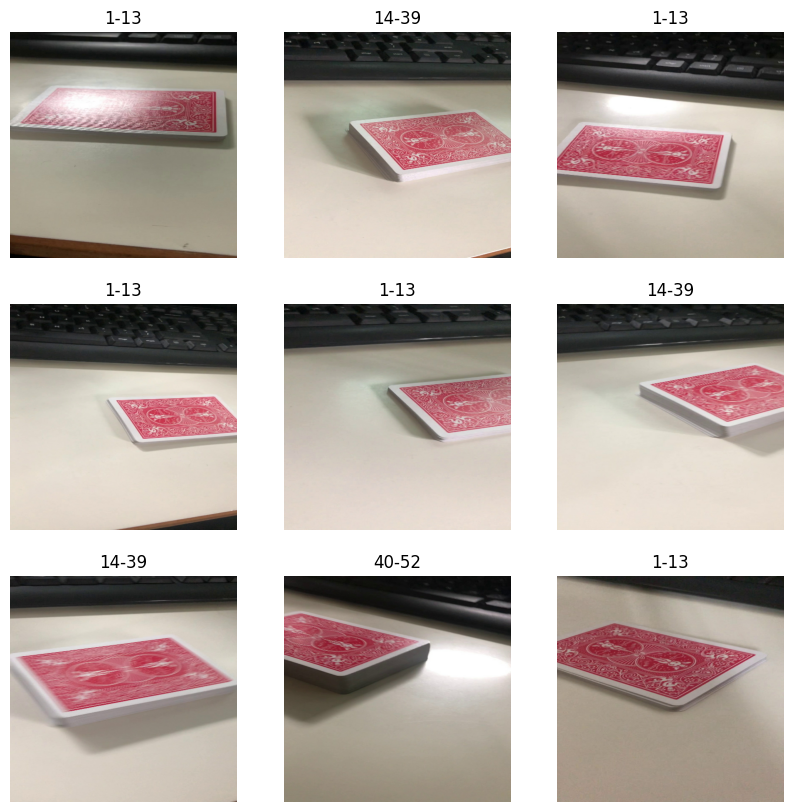

In [7]:
# visualize the first 9 images from the dataset
plt.figure(figsize=(10, 10))
for images, labels in train_ds.take(1):
  for i in range(9):
    ax = plt.subplot(3, 3, i + 1)
    plt.imshow(images[i].numpy().astype("uint8"))
    plt.title(class_names[labels[i]])
    plt.axis("off")

In [8]:
# image preprocessing 
normalization_layer = tf.keras.layers.Rescaling(1./255)
normalized_ds = train_ds.map(lambda x, y: (normalization_layer(x), y))
image_batch, labels_batch = next(iter(normalized_ds))
first_image = image_batch[0]
# rescale the rgb values frm 0-255 to 0-1 for tensorflow
print(np.min(first_image), np.max(first_image)) # we see that 

0.0 0.9121578


In [9]:
# what does this do?
AUTOTUNE = tf.data.AUTOTUNE

train_ds = train_ds.cache().prefetch(buffer_size=AUTOTUNE)
val_ds = val_ds.cache().prefetch(buffer_size=AUTOTUNE)

In [10]:
num_classes = 3

model = tf.keras.Sequential([
  tf.keras.layers.Rescaling(1./255), # rescaling layer 
  tf.keras.layers.Conv2D(32, 3, activation='relu'), # relu activation function
  tf.keras.layers.MaxPooling2D(), # maxpooling layer 
  tf.keras.layers.Conv2D(32, 3, activation='relu'), # convolution layer  
  tf.keras.layers.MaxPooling2D(),
  tf.keras.layers.Conv2D(32, 3, activation='relu'),
  tf.keras.layers.MaxPooling2D(),
  tf.keras.layers.Flatten(),
  tf.keras.layers.Dense(128, activation='relu'),
  tf.keras.layers.Dense(num_classes)
])

In [11]:
model.compile(
  optimizer='adam',
  loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
  metrics=['accuracy'])

In [12]:
model.fit(
  train_ds,
  validation_data=val_ds,
  epochs=8
)

Epoch 1/8
36/36 [==============================] - 15s 282ms/step - loss: 1.6269 - accuracy: 0.4443 - val_loss: 0.9958 - val_accuracy: 0.5230
Epoch 2/8
36/36 [==============================] - 7s 199ms/step - loss: 0.7515 - accuracy: 0.6749 - val_loss: 0.5579 - val_accuracy: 0.7420
Epoch 3/8
36/36 [==============================] - 7s 201ms/step - loss: 0.4138 - accuracy: 0.8277 - val_loss: 0.2910 - val_accuracy: 0.9011
Epoch 4/8
36/36 [==============================] - 7s 199ms/step - loss: 0.1839 - accuracy: 0.9408 - val_loss: 0.2273 - val_accuracy: 0.9293
Epoch 5/8
36/36 [==============================] - 7s 200ms/step - loss: 0.1109 - accuracy: 0.9585 - val_loss: 0.1971 - val_accuracy: 0.9364
Epoch 6/8
36/36 [==============================] - 7s 199ms/step - loss: 0.0504 - accuracy: 0.9841 - val_loss: 0.0802 - val_accuracy: 0.9682
Epoch 7/8
36/36 [==============================] - 7s 203ms/step - loss: 0.0166 - accuracy: 0.9973 - val_loss: 0.0666 - val_accuracy: 0.9753
Epoch 8/8
36